# Penguins Dataset Clustering

### [Penguins Dataset](https://seaborn.pydata.org/tutorial/introduction.html)

Author: [Kevin Thomas](mailto:ket189@pitt.edu)

## Citation

[1] Allison Horst, https://github.com/allisonhorst/palmerpenguins

## Import Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Load Dataset

In [2]:
df = sns.load_dataset('penguins')

## Perform Essential Exploration & Data Cleaning

### Display the initial number of rows and columns.

In [3]:
df.shape

(344, 7)

### Display the initial variable names and their associated data types.

In [4]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

### Display the number of missing values for each column, remove the missing values and create a clean copy of the dataset.

In [5]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [6]:
df_clean = df.dropna().copy()

In [7]:
df_clean.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

### Display the number of unique values for each column after removing missing data and before initial exploration.

In [8]:
df_clean.nunique()

species                3
island                 3
bill_length_mm       163
bill_depth_mm         79
flipper_length_mm     54
body_mass_g           93
sex                    2
dtype: int64

### Display the number of unique values for the categorical variables after removing missing data and before initial exploration.

In [9]:
df_clean.select_dtypes(exclude='number').nunique()

species    3
island     3
sex        2
dtype: int64

### Display the number of unique values for the continuous variables after removing missing data and before initial exploration.

In [10]:
df_clean.select_dtypes(include='number').nunique()

bill_length_mm       163
bill_depth_mm         79
flipper_length_mm     54
body_mass_g           93
dtype: int64

## Data Standardization

### Examine raw numeric features magnitude and scale.

The actual values in the boxplot represent the distributions of the penguin dataset’s numeric features: bill length (mm), bill depth (mm), flipper length (mm), and body mass (g). The plot shows that body mass is on a much larger scale than the other features, indicating that its values are much higher (in grams) compared to the millimeter measurements of the other features, which is important for understanding feature scaling and the need for standardization in data analysis.

In [11]:
df_clean.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


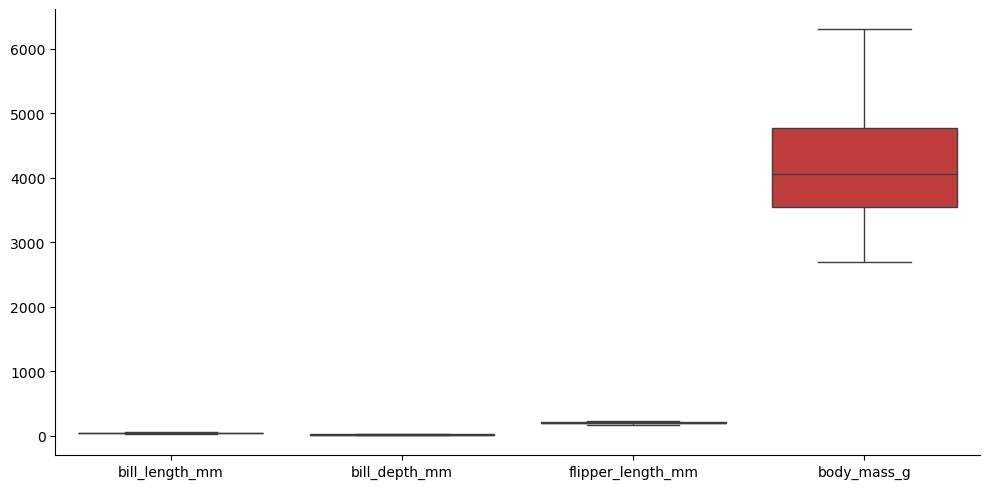

In [12]:
sns.catplot(data=df_clean, 
            kind='box', 
            aspect=2)
plt.show()

### Prepare the dataset by extracting our numeric features.

In [13]:
df_clean_features = df_clean.select_dtypes('number').\
                             copy()

### Standardize the numeric features.

In [14]:
X = StandardScaler().fit_transform(df_clean_features)

### Examine standarized numeric features magnitude and scale.

After standardization, all numeric features (bill length, bill depth, flipper length, and body mass) have similar distributions centered around zero with comparable spread, indicating that differences in scale have been removed and the features are now suitable for clustering and other analyses that assume equal variance.

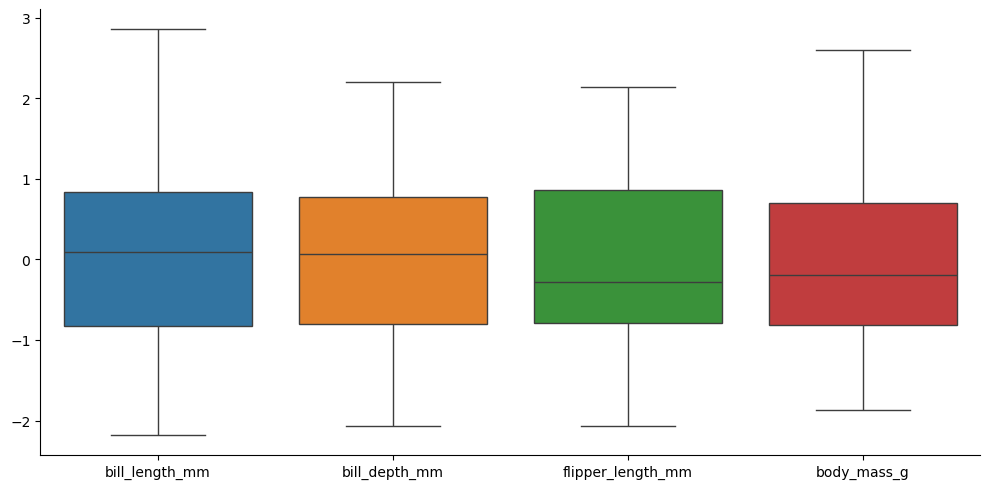

In [15]:
sns.catplot(data=pd.DataFrame(X, 
                              columns=df_clean_features.columns), 
                              kind='box', 
                              aspect=2)
plt.show()

## KMeans

### Initialize, fit and predict our KMeans by starting with two clusters.

In [16]:
clusters_2 = KMeans(n_clusters=2, 
                    random_state=42, 
                    n_init=25, 
                    max_iter=500).\
                    fit_predict(X)

### Assign cluster labels to a clean copied DataFrame.

In [17]:
df_clean_copy = df_clean.copy()

In [18]:
df_clean_copy['k2'] = pd.Series(clusters_2, 
                                index=df_clean_copy.index). \
                                astype('category')

### Visualize the clusters using a pair plot.

The pair plot shows that the KMeans clustering with two clusters separates the penguins into two distinct groups based on their physical measurements, with clear differences in bill length, bill depth, flipper length, and body mass between the clusters, indicating strong feature-based separation in the dataset.

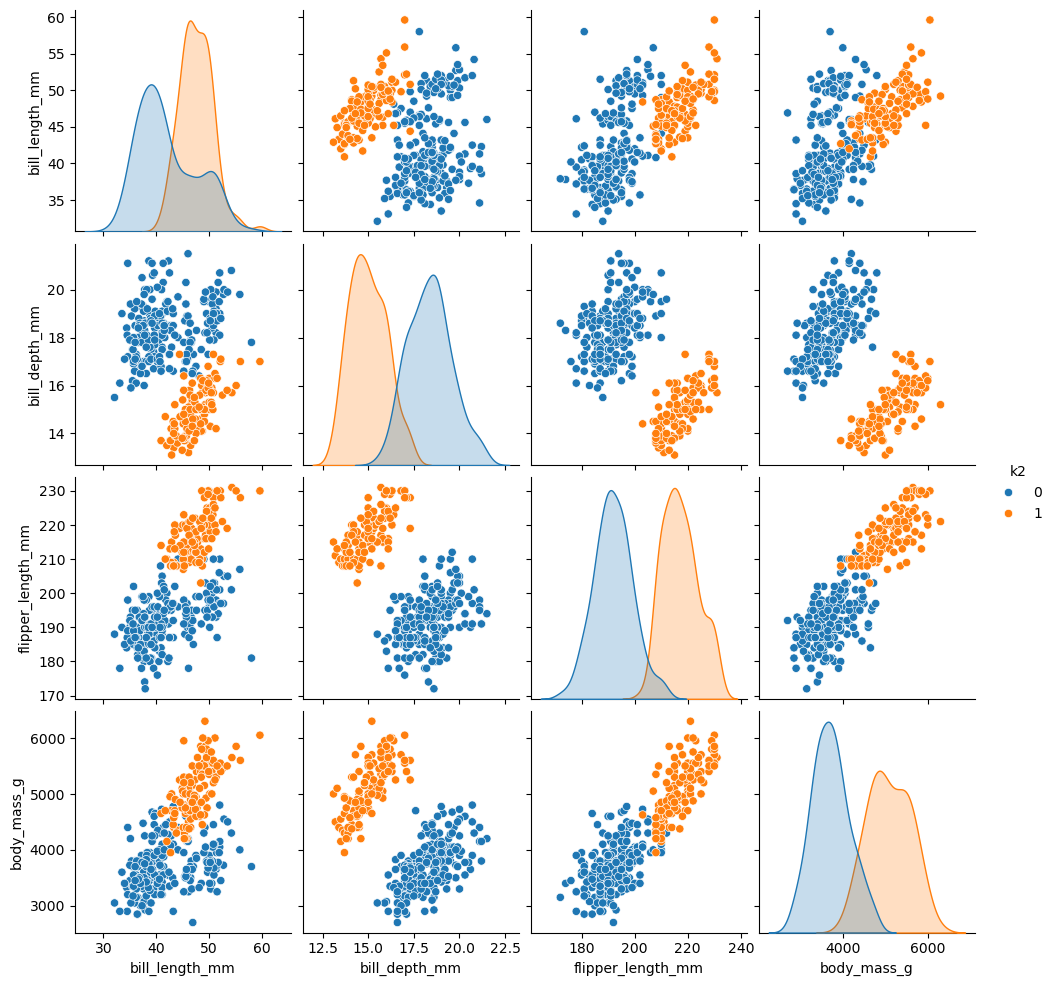

In [19]:
sns.pairplot(data=df_clean_copy, 
             hue='k2', 
             diag_kws={'common_norm': False})
plt.show()

### Visualize the cluster results on a scatter plot.

This scatter plot demonstrates that the two clusters identified by KMeans are well separated, with one group of penguins having higher body mass and lower bill depth, and the other group having lower body mass and higher bill depth, highlighting distinct physical differences between the clusters.

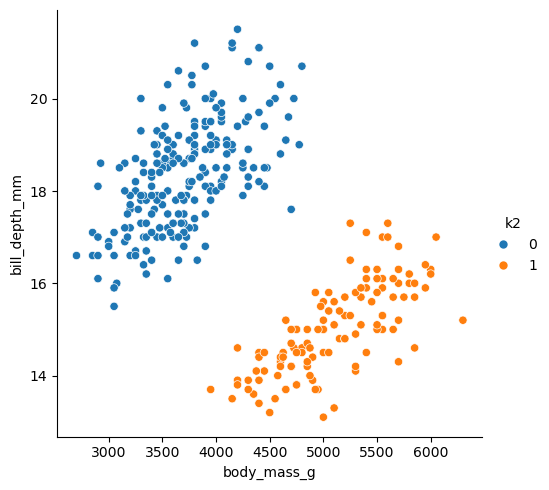

In [20]:
sns.relplot(data=df_clean_copy, 
            x='body_mass_g', 
            y='bill_depth_mm', 
            hue='k2')
plt.show()

### Use a heatmap to visually show how the clusters align with the known groupings.

The heatmap shows that both clusters contain similar numbers of male and female penguins, indicating that the clustering is not strongly driven by sex and that both groups are well represented across this categorical variable.

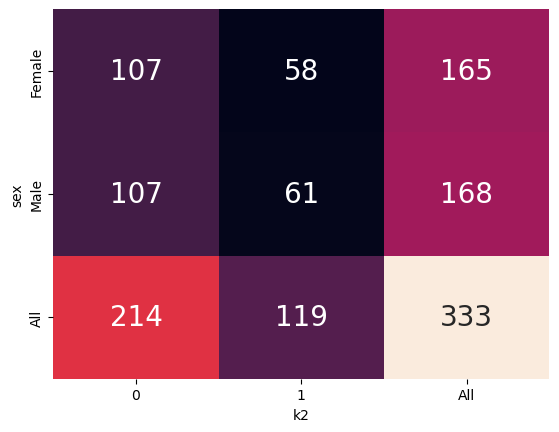

In [21]:
fig, ax = plt.subplots()
sns.heatmap(data=pd.crosstab(df_clean_copy.sex, 
                             df_clean_copy.k2, 
                             margins=True ), 
                             annot=True, 
                             annot_kws={"fontsize": 20}, 
                             fmt='g',
                             cbar=False,
                             ax=ax)
plt.show()

### Determine the optimal number of clusters.

In [22]:
tots_within = []
K = range(1, 31)
for k in K:
    km = KMeans(n_clusters=k, 
                random_state=42, 
                n_init=25, 
                max_iter=500)
    km = km.fit(X)
    tots_within.append(km.inertia_)

### Visualize the optimal number of clusters.

The elbow plot shows a sharp decrease in total within sum of squares as the number of clusters increases, with the curve flattening after about 2–3 clusters, suggesting that two or three clusters are optimal for capturing the main structure in the data.

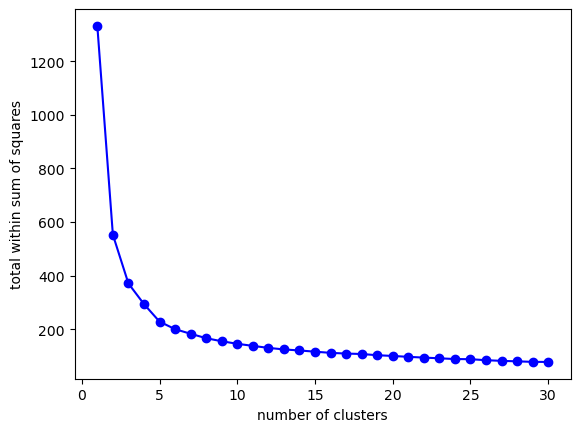

In [23]:
fig, ax = plt.subplots()
ax.plot( K, tots_within, 'bo-' )
ax.set_xlabel('number of clusters')
ax.set_ylabel('total within sum of squares')

plt.show()

### Use three clusters.

In [24]:
clusters_3 = KMeans(n_clusters=3, 
                    random_state=42, 
                    n_init=25, 
                    max_iter=500). \
                    fit_predict(X)

In [25]:
df_clean_copy['k3'] = pd.Series(clusters_3, 
                                index=df_clean_copy.index). \
                                astype('category')

### Visualize the clusters using a pair plot.

The pair plot with three clusters reveals that the penguins are grouped into three distinct sets based on their physical measurements, with each cluster showing unique combinations of bill length, bill depth, flipper length, and body mass, suggesting the presence of three underlying subpopulations in the dataset.

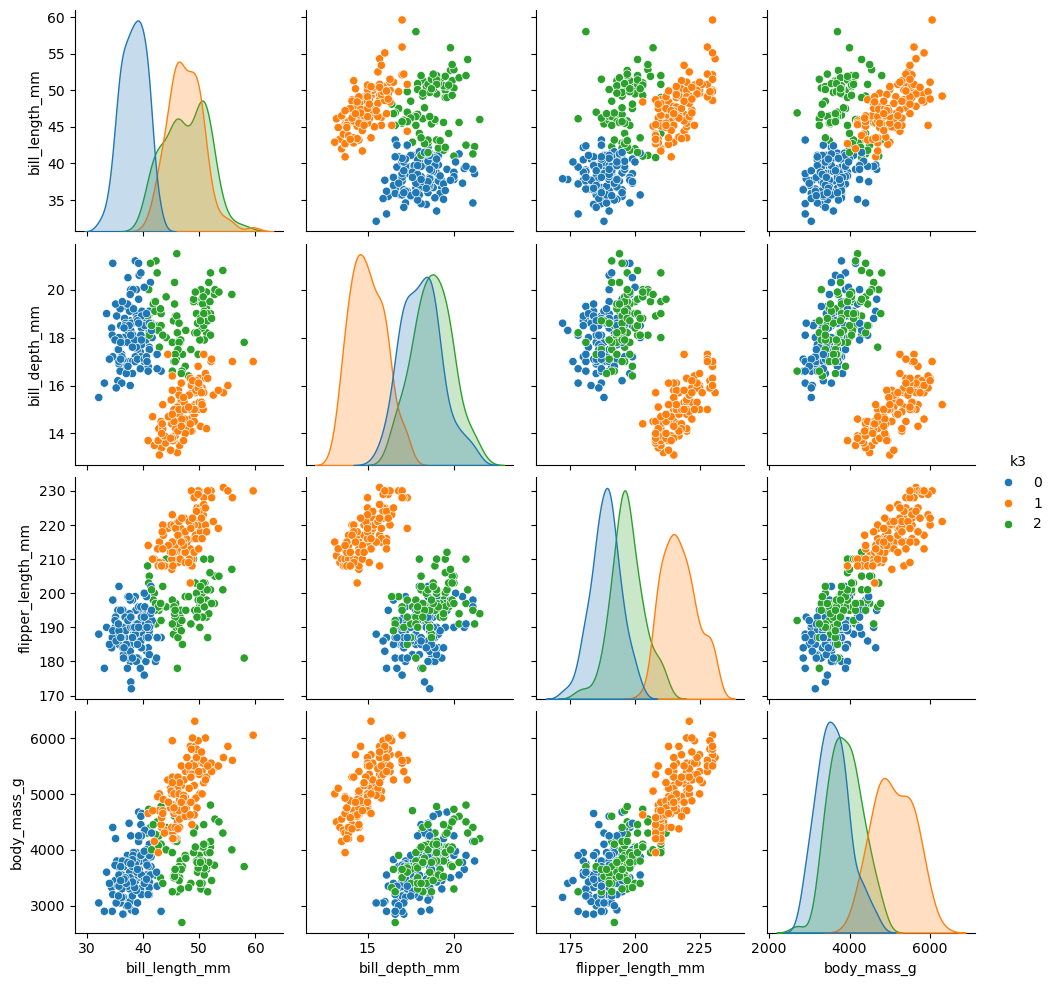

In [26]:
sns.pairplot(data=df_clean_copy, 
             hue='k3', 
             diag_kws={'common_norm': False})
plt.show()

### Display the number of unique values for the categorical variables after removing missing data and before initial exploration.

In [27]:
df_clean_copy.select_dtypes(exclude='number').nunique()

species    3
island     3
sex        2
k2         2
k3         3
dtype: int64

### Display the number of unique values for the continuous variables after removing missing data and before initial exploration.

In [28]:
df_clean_copy.select_dtypes(include='number').nunique()

bill_length_mm       163
bill_depth_mm         79
flipper_length_mm     54
body_mass_g           93
dtype: int64

### Visualize the cluster results on a scatter plot.

This scatter plot shows that the three clusters correspond closely to the three penguin species, with each species occupying a distinct region in the bill length and bill depth space, demonstrating that the clustering effectively captures species-level differences in these physical traits.

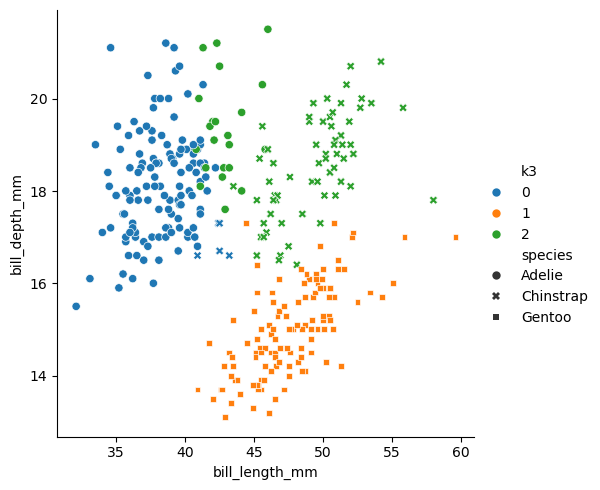

In [29]:
sns.relplot(data=df_clean_copy, 
            x='bill_length_mm', 
            y='bill_depth_mm', 
            hue='k3',
            style='species')
plt.show()

### Use a heatmap to visually show how the clusters align with the known groupings.

The heatmap shows a strong correspondence between clusters and species: each cluster almost exclusively contains one species, confirming that the clustering algorithm has successfully separated Adelie, Chinstrap, and Gentoo penguins based on their physical measurements.

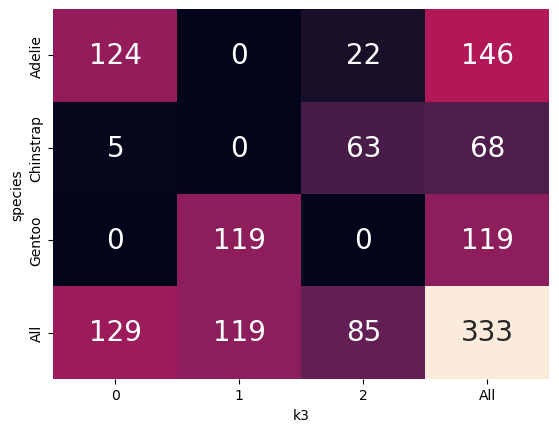

In [30]:
fig, ax = plt.subplots()
sns.heatmap(data=pd.crosstab(df_clean_copy.species, 
                             df_clean_copy.k3, 
                             margins=True ), 
                             annot=True, 
                             annot_kws={"fontsize": 20}, 
                             fmt='g',
                             cbar=False,
                             ax=ax)
plt.show()

## PCA

In [31]:
pca_df_clean_copy = PCA(n_components=2). \
                        fit_transform(X)

In [32]:
pca_df_clean_copy_df = pd.DataFrame(pca_df_clean_copy, 
                                    columns=['pc01', 
                                             'pc02'])

In [33]:
pca_df_clean_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pc01    333 non-null    float64
 1   pc02    333 non-null    float64
dtypes: float64(2)
memory usage: 5.3 KB


This PCA scatter plot shows that the first two principal components capture clear structure in the data, with the points forming two well-separated groups, indicating strong underlying variation and suggesting that dimensionality reduction effectively reveals major patterns in the penguin measurements.

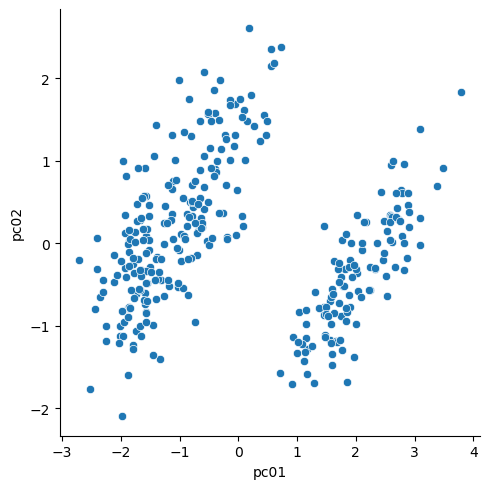

In [34]:
sns.relplot(data=pca_df_clean_copy_df, 
            x='pc01', 
            y='pc02')
plt.show()

The heatmap of the PCA components' correlation matrix shows that pc01 and pc02 are completely uncorrelated (correlation ≈ 0), confirming that the principal components are orthogonal and capture independent sources of variance in the standardized penguin measurements.

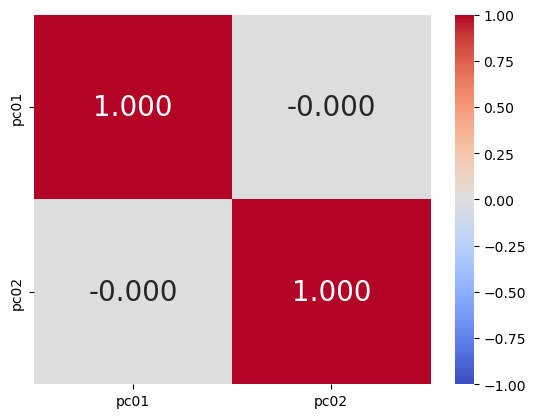

In [35]:
fig, ax = plt.subplots()
sns.heatmap(pca_df_clean_copy_df.corr(numeric_only=True),
            vmin=-1, 
            vmax=1, 
            center=0,
            cmap='coolwarm',
            annot=True, 
            annot_kws={'fontsize': 20}, 
            fmt='.3f',
            ax=ax)
plt.show()

This scatter plot with regression line shows that there is no significant linear relationship between the first and second principal components, confirming their statistical independence and the effectiveness of PCA in separating the main sources of variance in the data.

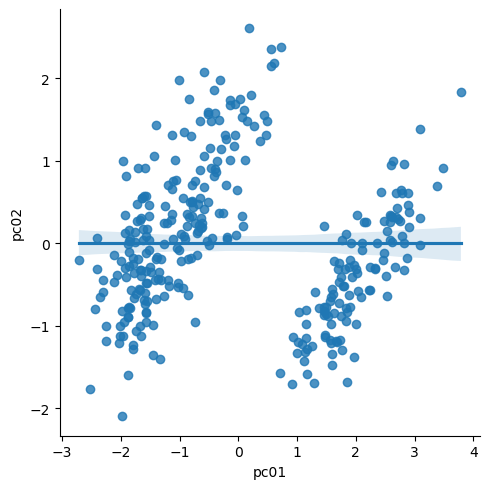

In [36]:
sns.lmplot(data=pca_df_clean_copy_df, 
           x='pc01', 
           y='pc02')
plt.show()

The regression lines in this PCA scatter plot show that each penguin species has a distinct linear trend in the principal component space, highlighting species-specific variation and confirming that PCA effectively separates the three species based on their physical measurements.

In [37]:
pca_df_clean_copy_df['species'] = df_clean_copy['species']

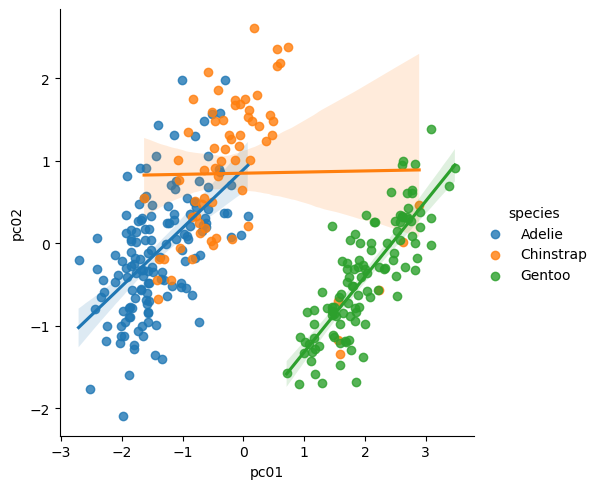

In [38]:
sns.lmplot(data=pca_df_clean_copy_df, 
           x='pc01', 
           y='pc02', 
           hue='species')
plt.show()

## Clustering & PCA

In [39]:
pca_df_clean_copy_df['k2'] = pd.Series(clusters_2, 
                                       index=pca_df_clean_copy_df. \
                                       index). \
                                       astype('category')

In [40]:
pca_df_clean_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   pc01     333 non-null    float64 
 1   pc02     333 non-null    float64 
 2   species  324 non-null    object  
 3   k2       333 non-null    category
dtypes: category(1), float64(2), object(1)
memory usage: 8.4+ KB


Both scatter plots demonstrate that the KMeans clustering algorithm effectively separates the penguins into two distinct groups, whether visualized in the original feature space (body mass vs. bill depth) or in the reduced PCA space (pc01 vs. pc02). In both cases, the clusters are well separated, indicating that the underlying physical measurements and their principal components capture strong, non-overlapping patterns in the data. The PCA plot further confirms that dimensionality reduction preserves the cluster structure, with each group occupying a distinct region in the principal component space, validating the consistency and robustness of the clustering results across different representations of the data.

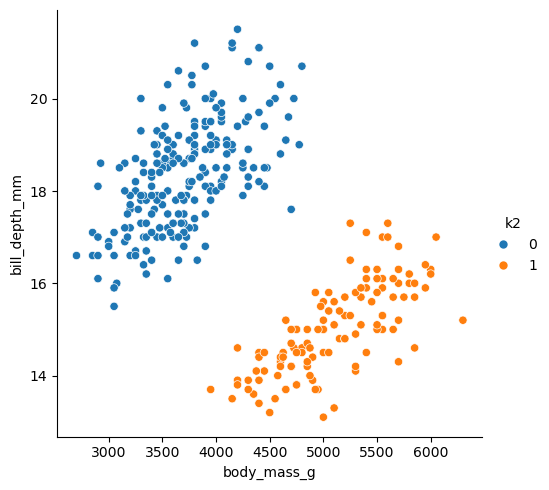

In [41]:
sns.relplot(data=df_clean_copy, 
            x='body_mass_g', 
            y='bill_depth_mm', 
            hue='k2')
plt.show()

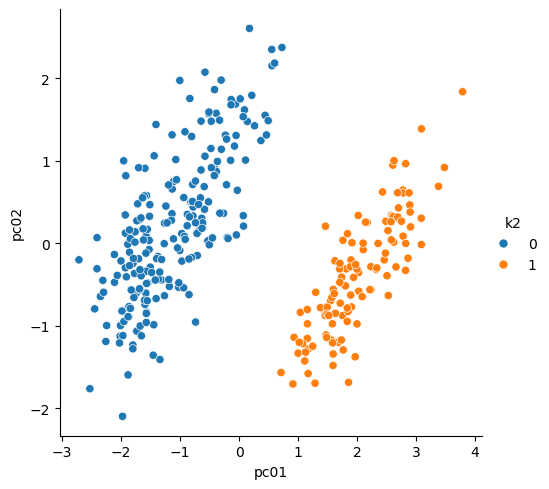

In [42]:
sns.relplot(data=pca_df_clean_copy_df, 
            x='pc01', 
            y='pc02', 
            hue='k2')
plt.show()